# CNN with Food Vision - CNN - Binary Classification

- with [pizza-steak dataset](https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip)

In [40]:
import zipfile

# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

extractor= zipfile.ZipFile(r"../DATA/MRD_BROUKE/pizza_steak.zip")
extractor.extractall("./data/")
extractor.close()

## Counting the files 

In [41]:
import os

# Walk thorugh the data directory and list the files

for dir_path, dir_name, filenames in os.walk("./data/") :
    print(f"There are {len(dir_name)} directories and {len(filenames)} images in {dir_path}")

# Test : 250 images
# Train : 750 images

There are 2 directories and 0 images in ./data/
There are 2 directories and 1 images in ./data/pizza_steak
There are 2 directories and 1 images in ./data/pizza_steak\test
There are 0 directories and 250 images in ./data/pizza_steak\test\pizza
There are 0 directories and 250 images in ./data/pizza_steak\test\steak
There are 2 directories and 1 images in ./data/pizza_steak\train
There are 0 directories and 750 images in ./data/pizza_steak\train\pizza
There are 0 directories and 750 images in ./data/pizza_steak\train\steak
There are 1 directories and 1 images in ./data/__MACOSX
There are 2 directories and 3 images in ./data/__MACOSX\pizza_steak
There are 0 directories and 3 images in ./data/__MACOSX\pizza_steak\test
There are 0 directories and 3 images in ./data/__MACOSX\pizza_steak\train


In [42]:
# Another way to check the count 

print("Traning size -- ",len(os.listdir("./data/pizza_steak/train/pizza/")), len(os.listdir("./data/pizza_steak/train/steak/")))  
print("Testing Size -- ",len(os.listdir("./data/pizza_steak/test/steak/")), len(os.listdir("./data/pizza_steak/test/steak/")))

Traning size --  750 750
Testing Size --  250 250


## Getting the class names from folder names

In [16]:
# Getting the list of class names
os.listdir("./data/pizza_steak/train/")[1:]

['pizza', 'steak']

In [23]:
import pathlib
import numpy as np

In [36]:
dir= pathlib.Path("./data/pizza_steak/train/")
class_names= np.array([])

for item in dir.glob("*"):
    print(item," >> ", item.name)
    class_names=np.append(class_names,item.name)
    

class_names= np.sort(class_names)
class_names= np.delete(class_names,0)

data\pizza_steak\train\.DS_Store  >>  .DS_Store
data\pizza_steak\train\pizza  >>  pizza
data\pizza_steak\train\steak  >>  steak


In [37]:
class_names

array(['pizza', 'steak'], dtype='<U32')

## Visualizing the image

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [50]:
def view_random_image(target_dir, target_class) :
    """
    viewing a random image of a particular target class from a target directory
    """
    if not target_dir or not target_class :
        raise Exception("Must provide mandatory arguements - target_dir or target_class")
    
    target_folder= os.path.join(target_dir, target_class)
    img_name= random.sample(os.listdir(target_folder),1)[0]
    
    img= mpimg.imread(os.path.join(target_folder,img_name))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print("shape : ", img.shape, end="\n\n")
    
    return img

shape :  (384, 512, 3)

shape :  (512, 512, 3)



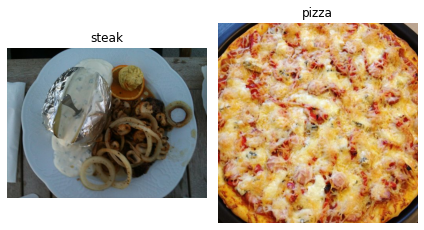

In [56]:
plt.figure()

# View a random image from the training dataset
plt.subplot(1, 2, 1)
steak_img = view_random_image(target_dir="./data/pizza_steak/train/", target_class="steak")

plt.subplot(1, 2, 2)
pizza_img = view_random_image(target_dir="./data/pizza_steak/train/",
                        target_class="pizza")

plt.tight_layout()

## Preprocessing the data 

In [57]:
train_dir= "./data/pizza_steak/train/"
test_dir= "./data/pizza_steak/test/"

In [58]:
import tensorflow as tf
from tensorflow import keras

In [59]:
# Image DATA Generator
# https://keras.io/api/preprocessing/image/

train_gen= keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.)
test_gen= keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.)

In [60]:
train_data= train_gen.flow_from_directory(train_dir, target_size=(224,224),batch_size=32, class_mode="binary", shuffle=False)
test_data= test_gen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode="binary", shuffle=False)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [66]:
# Seeing a sample

img_sample, label=train_data.next()
img_sample.shape,label.shape

((32, 224, 224, 3), (32,))

(-0.5, 223.5, 223.5, -0.5)

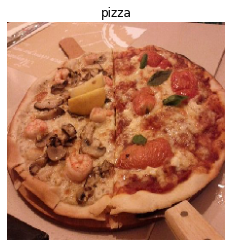

In [73]:
# picking 15th image

sample= img_sample[25]
plt.imshow(sample)
plt.title(class_names[round(label[15])])
plt.axis("off")

## Model 1- Baseline Model

In [77]:
model_1= keras.Sequential([
    keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu", input_shape=(224,224,3)),
    keras.layers.MaxPool2D(pool_size=2, strides=1, padding="valid"),
    keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2, strides=1, padding="valid"),
    keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2, strides=1, padding="valid"),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
], name="model-1")

model_1.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 221, 221, 10)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 219, 219, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 218, 218, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 216, 216, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 215, 215, 10)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 462250)            0   

In [78]:
model_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
hist_1= model_1.fit(train_data,
                    epochs=5, 
                    steps_per_epoch=len(train_data), 
                    validation_data=test_data, 
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 121s 3s/step - loss: 21.2713 - accuracy: 0.4760 - val_loss: 0.6837 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 119s 3s/step - loss: 0.6674 - accuracy: 0.5360 - val_loss: 0.6540 - val_accuracy: 0.6420
Epoch 3/5
47/47 [==============================] - 125s 3s/step - loss: 0.6565 - accuracy: 0.6487 - val_loss: 0.6404 - val_accuracy: 0.6780
Epoch 4/5
47/47 [==============================] - 120s 3s/step - loss: 0.6437 - accuracy: 0.7087 - val_loss: 0.6331 - val_accuracy: 0.5780
Epoch 5/5
47/47 [==============================] - 125s 3s/step - loss: 0.6385 - accuracy: 0.6767 - val_loss: 0.6186 - val_accuracy: 0.6520


In [87]:

# Plot the validation and training data separately
def plot_loss_curves(history):
    
    """
    Returns separate loss curves for training and validation metrics.
    """
    
    if not history:
        raise Exception("history is missing...")
        
    epochs= None
    
    if not ("loss" in history.history.keys() or "val_loss" in history.history.keys()):
        print("Loss or val_loss keys are absent")
    else:
        
        epochs = range(len(history.history['loss']))
        
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        
        # Plot loss
        plt.plot(epochs, loss, label='training_loss')
        plt.plot(epochs, val_loss, label='val_loss')
        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.legend()
    
    if not ("loss" in history.history.keys() or "val_loss" in history.history.keys()):
        print("Loss or val_loss keys are absent")
    else:
        accuracy = history.history['accuracy']
        val_accuracy = history.history['val_accuracy']

        # Plot accuracy
        plt.figure()
        plt.plot(epochs, accuracy, label='training_accuracy')
        plt.plot(epochs, val_accuracy, label='val_accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.legend();

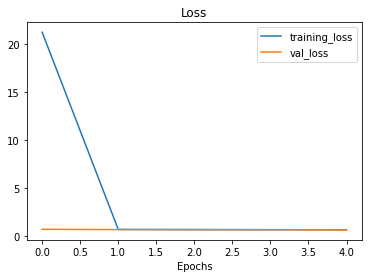

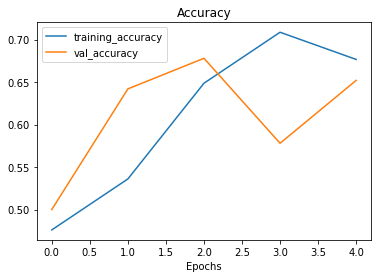

In [88]:
plot_loss_curves(hist_1)

## Data Augmentation - Model 2

In [89]:
train_gen_augment= keras.preprocessing.image.ImageDataGenerator(rescale= 1/255. , 
                                                                rotation_range= 20,
                                                                shear_range= 0.2,
                                                                zoom_range= 0.2,
                                                                width_shift_range= 0.2,
                                                                height_shift_range= 0.2,
                                                                horizontal_flip= True)

# Create ImageDataGenerator test instance without data augmentation
test_gen_2 = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

In [90]:
train_data= train_gen_augment.flow_from_directory(train_dir, 
                                                  target_size=(224,224),
                                                  batch_size=32, 
                                                  class_mode="binary", 
                                                  shuffle=False)

test_data= test_gen_2.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode="binary", shuffle=False)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [92]:
augmented_images, augmented_labels = train_data.next()
augmented_images.shape, augmented_labels.shape

((32, 224, 224, 3), (32,))

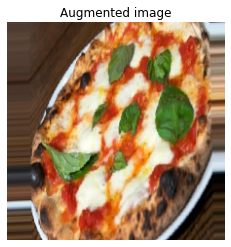

In [93]:

random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [94]:
model_2= keras.Sequential([
    keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu", input_shape=(224,224,3)),
    keras.layers.MaxPool2D(pool_size=2, strides=1, padding="valid"),
    
    keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2, strides=1, padding="valid"),
    
    keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2, strides=1, padding="valid"),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
], name="model-2")

model_2.summary()

Model: "model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 221, 221, 10)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 219, 219, 10)      910       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 218, 218, 10)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 216, 216, 10)      910       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 215, 215, 10)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 462250)            0   

In [95]:
model_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
hist_2= model_2.fit(train_data,
                    epochs=5, 
                    steps_per_epoch=len(train_data), 
                    validation_data=test_data, 
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 118s 3s/step - loss: 6.7092 - accuracy: 0.6620 - val_loss: 0.6661 - val_accuracy: 0.5620
Epoch 2/5
47/47 [==============================] - 105s 2s/step - loss: 0.7185 - accuracy: 0.4673 - val_loss: 0.6719 - val_accuracy: 0.5540
Epoch 3/5
47/47 [==============================] - 106s 2s/step - loss: 0.6735 - accuracy: 0.6267 - val_loss: 0.7275 - val_accuracy: 0.5200
Epoch 4/5
47/47 [==============================] - 105s 2s/step - loss: 0.6841 - accuracy: 0.5847 - val_loss: 0.6149 - val_accuracy: 0.6400
Epoch 5/5
47/47 [==============================] - 108s 2s/step - loss: 0.6780 - accuracy: 0.5860 - val_loss: 0.6145 - val_accuracy: 0.7520


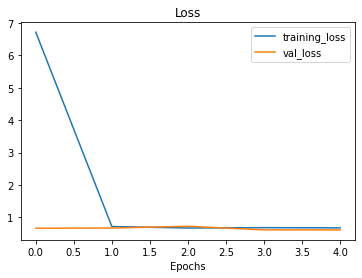

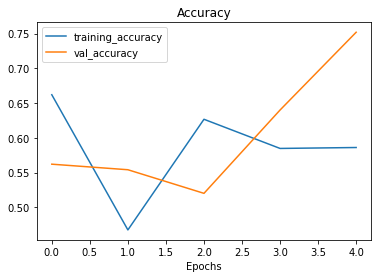

In [96]:
plot_loss_curves(hist_2)

# Trying with Shuffling : True  || MODEL 3

In [97]:
train_data= train_gen_augment.flow_from_directory(train_dir, 
                                                  target_size=(224,224),
                                                  batch_size=32, 
                                                  class_mode="binary", 
                                                  shuffle=True)

test_data= test_gen_2.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode="binary", shuffle=True)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [101]:

model_3= keras.Sequential([
    keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu", input_shape=(224,224,3)),
    keras.layers.MaxPool2D(pool_size=2, strides=1, padding="valid"),
    
    keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2, strides=1, padding="valid"),
    
    keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2, strides=1, padding="valid"),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
], name="model-3")

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer="adam",
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 126s 3s/step - loss: 0.9752 - accuracy: 0.6407 - val_loss: 0.4578 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 116s 2s/step - loss: 0.5002 - accuracy: 0.7593 - val_loss: 0.3807 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 129s 3s/step - loss: 0.4932 - accuracy: 0.7653 - val_loss: 0.4163 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 120s 3s/step - loss: 0.4712 - accuracy: 0.7773 - val_loss: 0.3730 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 111s 2s/step - loss: 0.4430 - accuracy: 0.8007 - val_loss: 0.3378 - val_accuracy: 0.8540


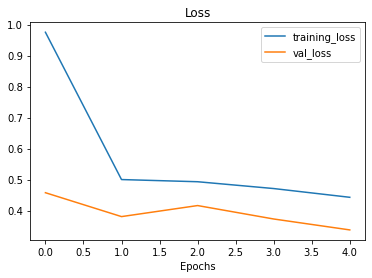

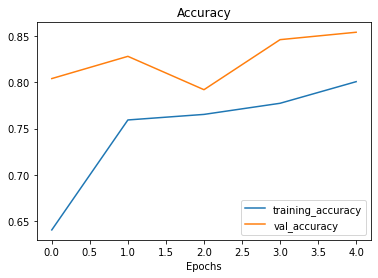

In [103]:
plot_loss_curves(history_3)

## Model 4

In [114]:

model_4= keras.Sequential([
    keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu", input_shape=(224,224,3)),
    keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2, strides=1, padding="valid"),

    keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu"),
    keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding="valid", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2, strides=1, padding="valid"),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
], name="model-4")

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer="adam",
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data, # now the augmented data is shuffled
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 124s 3s/step - loss: 0.7331 - accuracy: 0.6140 - val_loss: 0.5081 - val_accuracy: 0.7480
Epoch 2/10
47/47 [==============================] - 120s 3s/step - loss: 0.5753 - accuracy: 0.7220 - val_loss: 0.3990 - val_accuracy: 0.8400
Epoch 3/10
47/47 [==============================] - 116s 2s/step - loss: 0.5002 - accuracy: 0.7693 - val_loss: 0.3557 - val_accuracy: 0.8640
Epoch 4/10
47/47 [==============================] - 123s 3s/step - loss: 0.4906 - accuracy: 0.7753 - val_loss: 0.4002 - val_accuracy: 0.8340
Epoch 5/10
47/47 [==============================] - 120s 3s/step - loss: 0.4813 - accuracy: 0.7913 - val_loss: 0.3420 - val_accuracy: 0.8440
Epoch 6/10
47/47 [==============================] - 127s 3s/step - loss: 0.4929 - accuracy: 0.7727 - val_loss: 0.3173 - val_accuracy: 0.8840
Epoch 7/10
47/47 [==============================] - 112s 2s/step - loss: 0.4702 - accuracy: 0.7793 - val_loss: 0.3718 - val_accuracy: 0.8440
Epoch 8/10
47

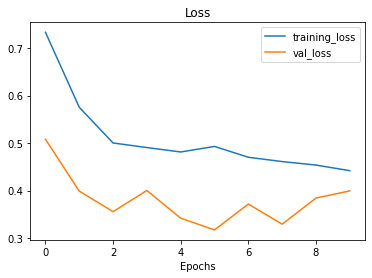

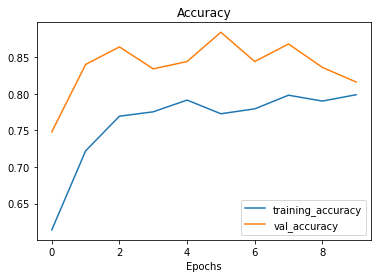

In [115]:
plot_loss_curves(history_4)

## Testing with Random image

In [118]:
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 

# https://stackoverflow.com/a/8286449/12210002
# https://stackoverflow.com/a/21595698/12210002

import requests
url= r"https://github.com/mrdbourke/tensorflow-deep-learning/blob/260d8cf2b61713f05a80b619f4e52d5f39e22dfa/images/03-steak.jpeg"
content= requests.get(url)
with open("./sample-1.jpeg", 'wb') as f:
        f.write(response.content)

SSLError: HTTPSConnectionPool(host='github.com', port=443): Max retries exceeded with url: /mrdbourke/tensorflow-deep-learning/blob/260d8cf2b61713f05a80b619f4e52d5f39e22dfa/images/03-steak.jpeg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1091)')))

In [ ]:
steak = mpimg.imread("sample-1.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# predicting

test_img_1= load_and_prep_image("sample-1.jpeg")
test_img_1.shape

In [ ]:
model_4.predict(test_img_1)

In [ ]:
# we have trained our data with (batch-size, height, widthm, channel), but here batch size is missing
# Add an extra axis
print(f"Shape before new dimension: {test_img_1.shape}")
steak = tf.expand_dims(test_img_1, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")

In [ ]:
pred= model_4.predict(steak)
pred

In [ ]:
class_names[]

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);